In [3]:
# !pip3 install tqdm

  Using cached https://files.pythonhosted.org/packages/63/f3/b7a1b8e40fd1bd049a34566eb353527bb9b8e9b98f8b6cf803bb64d8ce95/tqdm-4.62.3-py2.py3-none-any.whl


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os


In [2]:
data_dir = "../data/intermediary-data/"

In [3]:
# first lets check the creation of top n icd9 code datasets

def get_topN_mimic_data(path, save_dir, modes = ["train","validate","test"],n_labels = 50): #REWRITE
    """ Reads a comma separated value file.

    :param path: path to a csv file.
            save_dir: path to save filtered data
            n_labels: number of top icd9 codes to subset
    
    :return: List of records as dictionaries
    """
        # can create a dataset to return
    dataset = {}
    #run through each provided data mode or set i.e. train/valid/test files   
    for mode in tqdm(modes):    
        # read in the processed training data with all icd9 codes 
        df = pd.read_csv(f"{path}/notes2diagnosis-icd-{mode}.csv")
        df = df[["TEXT", "ICD9_CODE"]]
        
        # get the top N codes based on frequency in train data
        if mode == "train":
                top_codes = df['ICD9_CODE'].value_counts()[:n_labels].index.tolist()         
                print(f"number of codes: {len(top_codes)}")
        # rename columns
        df = df.rename(columns={'TEXT':'text', 'ICD9_CODE':'label'}) 
        # subset based on icd9 code being in top N
        df = df[df['label'].isin(top_codes)]
        df["text"] = df["text"].astype(str)
        df["label"] = df["label"].astype(str)

        
        if save_dir is not None:    
               
            print(f"Saving {mode} file at: {save_dir}/top_{n_labels}_icd9/{mode}.csv")
            if not os.path.exists(f"{save_dir}/top_{n_labels}_icd9"):
                os.makedirs(f"{save_dir}/top_{n_labels}_icd9")

            df.to_csv(f'{save_dir}/top_{n_labels}_icd9/{mode}.csv', index= None)
        # assign to dataset
        dataset[mode] = df
    return dataset

In [4]:
# now test this function

top30_train = get_topN_mimic_data(path = "../data/intermediary-data/", save_dir =None , n_labels=50)
# top50_train


  0%|          | 0/3 [00:00<?, ?it/s]

number of codes: 50
Saving train file at: ../data/intermediary-data/top_50_icd9/train.csv



 33%|███▎      | 1/3 [00:03<00:06,  3.50s/it]

Saving validate file at: ../data/intermediary-data/top_50_icd9/validate.csv



 67%|██████▋   | 2/3 [00:04<00:02,  2.07s/it]

Saving test file at: ../data/intermediary-data/top_50_icd9/test.csv


100%|██████████| 3/3 [00:05<00:00,  1.90s/it]


In [6]:
icd9_grouped = pd.read_csv(f"{data_dir}/triage/top_20_icd9_w_counts_descriptions_grouped.csv", index_col=None)

In [7]:
icd9_grouped

,icd9_code,count,description,Triage (post-ICU) Category
0,41401,2118,"Crnry athrscl natve vssl,Coronary atherosclero...",Cardiology
1,389,1043,"Septicemia NOS,Unspecified septicemia",AcuteMedicine
2,41071,988,"Subendo infarct, initial,Subendocardial infarc...",Cardiology
3,V3001,786,"Single lb in-hosp w cs,Single liveborn, born i...",Obstetrics
4,4241,711,"Aortic valve disorder,Aortic valve disorders",Cardiology
5,51881,613,"Acute respiratry failure,Acute respiratory fai...",Respiratory
6,V3000,520,"Single lb in-hosp w/o cs,Single liveborn, born...",Obstetrics
7,V3101,482,"Twin-mate lb-in hos w cs,Twin birth, mate live...",Obstetrics
8,431,460,"Intracerebral hemorrhage,None",Neurology
9,4240,323,"Mitral valve disorder,Mitral valve disorders",Cardiology


In [16]:
# get set of icd9_codes

icd9_codes_list = icd9_grouped["icd9_code"].values.tolist()
icd9_codes_list

['41401',
 '389',
 '41071',
 'V3001',
 '4241',
 '51881',
 'V3000',
 'V3101',
 '431',
 '4240',
 '486',
 '5070',
 '430',
 '4280',
 '41011',
 '41041',
 '5789',
 '5849',
 '1983',
 '5770']

In [8]:
# now lets subset the training/test datasets based on these groupings

train_data = pd.read_csv(f"{data_dir}/train.csv", index_col=None)
valid_data = pd.read_csv(f"{data_dir}/valid.csv", index_col=None)
test_data = pd.read_csv(f"{data_dir}/test.csv", index_col=None)

In [11]:
train_data.head()

,Unnamed: 0,text,label
0,1,: : : Sex: F Service: CARDIOTHORACIC Allergies...,4240
1,3,: : : Sex: F Service: NEONATOLOGY HISTORY: wee...,V3001
2,6,: : : Sex: M Service: CARDIOTHORACIC Allergies...,41041
3,7,: : : Sex: F Service: MEDICINE Allergies: Peni...,51881
4,8,: : : Sex: F Service: CARDIOTHORACIC Allergies...,3962


In [23]:
train_top20 = train_data[train_data["label"].isin(icd9_codes_list)]

In [20]:
icd9_grouped.head()

,icd9_code,count,description,Triage (post-ICU) Category
0,41401,2118,"Crnry athrscl natve vssl,Coronary atherosclero...",Cardiology
1,389,1043,"Septicemia NOS,Unspecified septicemia",AcuteMedicine
2,41071,988,"Subendo infarct, initial,Subendocardial infarc...",Cardiology
3,V3001,786,"Single lb in-hosp w cs,Single liveborn, born i...",Obstetrics
4,4241,711,"Aortic valve disorder,Aortic valve disorders",Cardiology


In [21]:
# we want to create a dictionary mapping code to category

mapping = {}
for i,row in icd9_grouped.iterrows():
    code = row['icd9_code']
    category = row['Triage (post-ICU) Category']
    
    mapping[code] = category

In [22]:
mapping

{'41401': 'Cardiology',
 '389': 'AcuteMedicine',
 '41071': 'Cardiology',
 'V3001': 'Obstetrics',
 '4241': 'Cardiology',
 '51881': 'Respiratory',
 'V3000': 'Obstetrics',
 'V3101': 'Obstetrics',
 '431': 'Neurology',
 '4240': 'Cardiology',
 '486': 'Respiratory',
 '5070': 'Respiratory',
 '430': 'Neurology',
 '4280': 'Cardiology',
 '41011': 'Cardiology',
 '41041': 'Cardiology',
 '5789': 'Gastroenterology',
 '5849': 'AcuteMedicine',
 '1983': 'Oncology',
 '5770': 'Gastroenterology'}

In [24]:
train_top20["category"] = train_top20["label"].map(mapping)

/home/niallt/venvs/nlp_projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
train_top20.drop(columns=["Unnamed: 0"])

,text,label,category
0,: : : Sex: F Service: CARDIOTHORACIC Allergies...,4240,Cardiology
1,: : : Sex: F Service: NEONATOLOGY HISTORY: wee...,V3001,Obstetrics
2,: : : Sex: M Service: CARDIOTHORACIC Allergies...,41041,Cardiology
3,: : : Sex: F Service: MEDICINE Allergies: Peni...,51881,Respiratory
6,: : : Sex: M Service: ADMISSION DIAGNOSIS: . S...,41401,Cardiology
...,...,...,...
14352,: : : Sex: F Service: MEDICINE Allergies: Pati...,5849,AcuteMedicine
14353,: : : Sex: F Service: MEDICINE Allergies: Peni...,486,Respiratory
14354,Unit No: : : : Sex: F Service: Neonatology was...,V3001,Obstetrics
14357,: : Service: CARDIOTHORACIC Allergies: Penicil...,41071,Cardiology


In [3]:
# make a lil function to extract the data for top 20 icd codes and attach the new labels/descriptions

def subset_data(df, icd9_data):
    #extract icd9 codes to list
    icd9_codes = icd9_data["icd9_code"].values.tolist()
    
    #subset data based on whether the code is in the desired list
    df_subset = df[df["label"].isin(icd9_codes)].copy()
    
    # get mappping dictionary for code -> triage category
    cat_map = map_codes(icd9_data)
    
    # create a new column with that mapping of ic9_code/label to triage category
    df_subset["triage-category"] = df_subset["label"].map(cat_map)
    
    # data has annoying unnamed column to drop
    try:
        df_subset.drop(columns=["Unnamed: 0"], inplace = True)
    except:
        print("no unnamed col to drop")

    return df_subset
    
    
def map_codes(icd9_data):
    
    '''
    Function to map icd9_code to triage category
    '''
    mapping = {}
    for i,row in icd9_data.iterrows():
        code = row['icd9_code']
        category = row['Triage (post-ICU) Category']

        mapping[code] = category
        
    return mapping


def data_processor(data_dir, icd9_path, modes=["train","valid","test"] ,save_dir = "../data/intermediary-data/triage/"):
    
    # get the icd9 data
    icd9_data = pd.read_csv(f"{data_dir}/{icd9_path}", index_col=None)
    
#     print(icd9_data)
    
    # can create a dataset to return
    dataset = {}
    #run through each provided data mode or set i.e. train/valid/test files   
    for mode in tqdm(modes):
        df = pd.read_csv(f"{data_dir}/top_50_icd9/{mode}.csv", index_col=None)
        df_with_cat = subset_data(df, icd9_data = icd9_data)

        if save_dir is not None:
            print(f"Saving {mode} file at: {save_dir}/{mode}")
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            df_with_cat.to_csv(f"{save_dir}/{mode}.csv", index = None)
            
        dataset[mode] = df_with_cat
        
    return dataset

In [4]:
new_train_data = data_processor(data_dir = f"{data_dir}", icd9_path = f"/triage/top_20_icd9_w_counts_descriptions_grouped.csv", save_dir = None)

 33%|███▎      | 1/3 [00:00<00:01,  1.26it/s]

no unnamed col to drop


100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

no unnamed col to drop


In [15]:
data_dir

'../data/intermediary-data/'

In [7]:
new_train_data['train']

,text,label,triage-category
0,: : : Sex: F Service: CARDIOTHORACIC Allergies...,4240,Cardiology
1,: : : Sex: F Service: NEONATOLOGY HISTORY: wee...,V3001,Obstetrics
2,: : : Sex: M Service: CARDIOTHORACIC Allergies...,41041,Cardiology
3,: : : Sex: F Service: MEDICINE Allergies: Peni...,51881,Respiratory
6,: : : Sex: M Service: ADMISSION DIAGNOSIS: . S...,41401,Cardiology
...,...,...,...
14352,: : : Sex: F Service: MEDICINE Allergies: Pati...,5849,AcuteMedicine
14353,: : : Sex: F Service: MEDICINE Allergies: Peni...,486,Respiratory
14354,Unit No: : : : Sex: F Service: Neonatology was...,V3001,Obstetrics
14357,: : Service: CARDIOTHORACIC Allergies: Penicil...,41071,Cardiology


<AxesSubplot:>

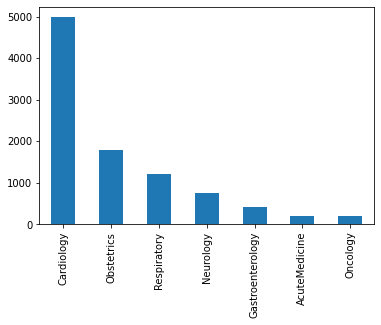

In [9]:
new_train_data['train']["triage-category"].value_counts().plot(kind="bar")